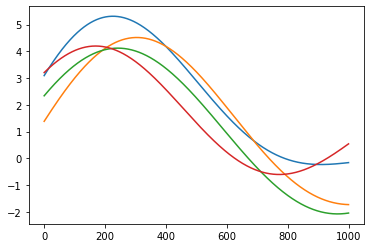

In [ ]:

import autograd.numpy as np
import scipy
from qutip import qeye, sigmax, sigmay, tensor, fock
from tested.getCtrl import getCtrl, pltCtrl
from tested.getFid import getFid
from tested.minimize import minimize
from tested.Hqc import Hqc, cat

NQ = 2; NC = 15
v1 = tensor(fock(NQ, 0), fock(NC, 0)).full()
v2 = tensor(fock(NQ, 0), cat(NC, 1.7)).full()
H0, Hcs = Hqc(NQ, NC, drive=1e-3, chi=3e-3, kerrQ=0.4, kerrC=1e-5)
H0 = np.array(H0.full())
Hcs = [np.array(Hci.full()) for Hci in Hcs]

a0 = np.random.rand(len(Hcs), 10
                    , 3)
U0 = np.array([v1]).T
Ugoal = np.array([v2]).T
T = 1000
a0[:,:,1] /= T
pltCtrl(a0, T)
def Hat(a,t):
    c = getCtrl(a, t, T) + 1e-3
    H = H0 + sum([ c[i]*Hcs[i] for i in range(len(Hcs)) ])
    return H
def goalFunc(U):
        fid = getFid(Ugoal, U)
        return 1 - fid
def callback(a):
    pltCtrl(a, T)
a = minimize(a0, U0, Hat, T, goalFunc, callback)